In [1]:
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train_dir = os.path.join('image_dataset', 'train')

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    image_size=(150, 150)
)

train_ds.class_names

Found 8 files belonging to 2 classes.


['Call of Duty', 'Journey']

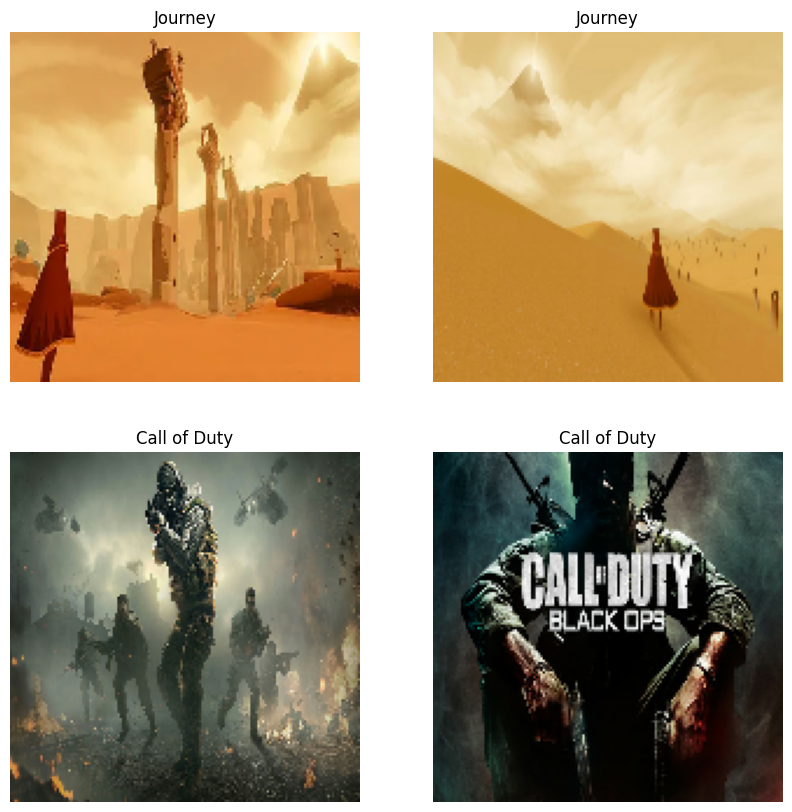

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(4):
    ax = plt.subplot(2, 2, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(train_ds.class_names[labels[i]])
    plt.axis("off")

In [4]:
es = tf.keras.callbacks.EarlyStopping(
    monitor='loss', mode='min', verbose=1, patience=5
)

# Save highest accuracy model
mc = tf.keras.callbacks.ModelCheckpoint(
    'best_model.h5', monitor='accuracy', mode='max', verbose=1, save_best_only=True
)

model = Sequential()

model.add(Conv2D(32, (2, 2), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(2, 2))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 149, 149, 32)      416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 74, 74, 32)       128       
 ormalization)                                                   
                                                                 
 flatten (Flatten)           (None, 175232)            0         
                                                                 
 dense (Dense)               (None, 1)                 175233    
                                                                 
Total params: 175,777
Trainable params: 175,713
Non-trai

In [35]:
history = model.fit(train_ds, epochs=3, callbacks=[es, mc])

Epoch 1/3
1/1 [==============================] - ETA: 0s - loss: 0.8197 - accuracy: 0.3750
Epoch 1: accuracy improved from -inf to 0.37500, saving model to best_model.h5
1/1 [==============================] - 1s 676ms/step - loss: 0.8197 - accuracy: 0.3750
Epoch 2/3
1/1 [==============================] - ETA: 0s - loss: 7.9586e-05 - accuracy: 1.0000
Epoch 2: accuracy improved from 0.37500 to 1.00000, saving model to best_model.h5
1/1 [==============================] - 0s 120ms/step - loss: 7.9586e-05 - accuracy: 1.0000
Epoch 3/3
1/1 [==============================] - ETA: 0s - loss: 3.3956e-07 - accuracy: 1.0000
Epoch 3: accuracy did not improve from 1.00000
1/1 [==============================] - 0s 79ms/step - loss: 3.3956e-07 - accuracy: 1.0000


1/1 [==============================] - 0s 21ms/step


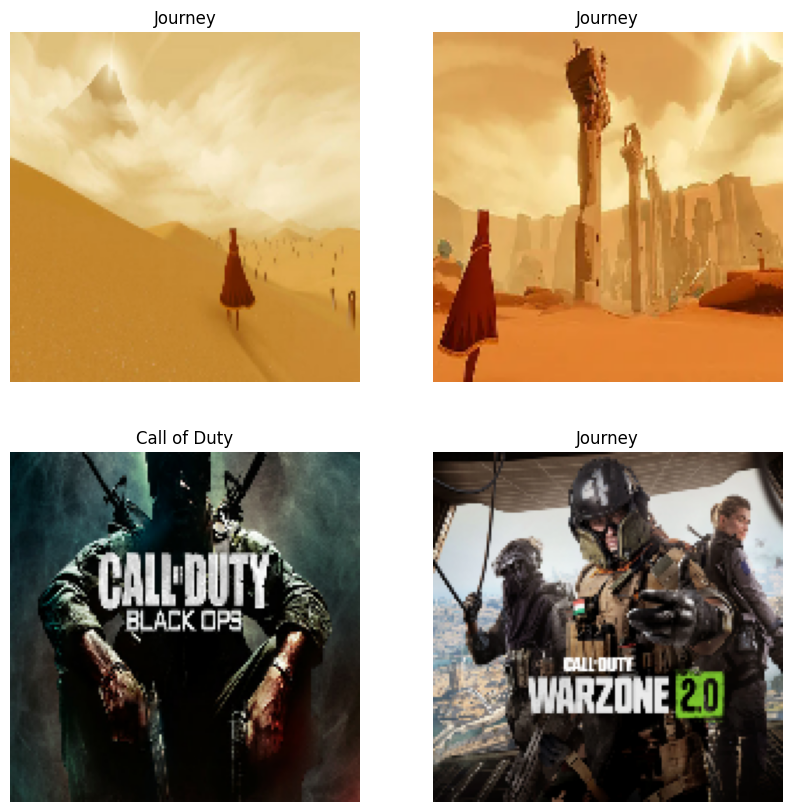

In [38]:
# Load best model
model = tf.keras.models.load_model('best_model.h5')
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(4):
    ax = plt.subplot(2, 2, i + 1)
    img = tf.expand_dims(images[i], axis=0)  # Add batch dimension
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(train_ds.class_names[round(model.predict(img)[0][0])])
    plt.axis("off")